In [1]:
import pennylane as qml
import numpy as np
from IPython.core.display import SVG
import matplotlib.pyplot as plt

### Codercise I.11.1 — Preparing basis state

For this codercise, you will write a circuit in PennyLane that accepts an integer value, then prepares and returns the corresponding computational basis state vector  (Assume a 3-qubit device). Try a few examples; does the appearance of the state vector match what you expect given the integer?

In [2]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The computational basis state |basis_id>.
    """

    # CREATE THE BASIS STATE
    bin_basis = str(np.binary_repr(basis_id, width=num_wires))

    for i in range(num_wires):
        if bin_basis[i] == '1':
            qml.PauliX(wires=i)

    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")

Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


### Codercise I.11.3 — Expectation value of two-qubit observable

Write a PennyLane circuit that creates the state $$|1 - \rangle = |1 \rangle \otimes | - \rangle.$$ Then, measure the expectation value of the two-qubit observable $$Z \otimes X.$$ In PennyLane, you can combine observables using the @ symbol to represent the tensor product, e.g., qml.PauliZ(0) @ qml.PauliZ(1).

In [3]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def create_one_minus():

    # PREPARE |1>|->
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X

    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))


print(create_one_minus())

0.9999999999999996


### Codercise I.11.4 — Double Trouble

% Implement the following circuit twice. For one version, measure the observables $Z$ on the first qubit (i.e., $Z \otimes I$), and $Z$ on the second qubit ($I \otimes Z$). For the other version, measure the observable $Z \otimes Z.$ How do you think the results of the first circuit will relate to those of the second? Plot the results as a function of $\theta$ to test your hypothesis.

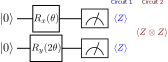

In [4]:
SVG(filename='circuit_i-11-4.svg')

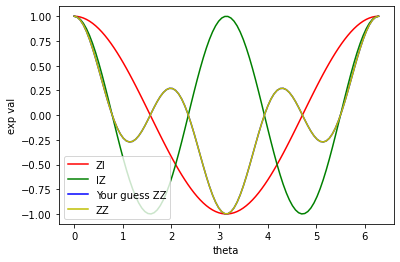

In [5]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    qml.RX(theta, wires=0)
    qml.RX(2 * theta, wires=1)

    return qml.expval(qml.PauliZ(wires=0)), qml.expval(qml.PauliZ(wires=1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """

    qml.RX(theta, wires=0)
    qml.RX(2* theta, wires=1)

    return qml.expval(qml.PauliZ(wires=0) @ qml.PauliZ(wires=1))


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (np.array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (np.array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        np.array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """

    combined_results = np.zeros(len(ZI_results))

    combined_results = ZI_results * IZ_results

    return combined_results


theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
plt.plot(theta, ZI_results, color='r', label='ZI')
plt.plot(theta, IZ_results, color='g', label='IZ')
plt.plot(theta, combined_results, color='b', label='Your guess ZZ')
plt.plot(theta, ZZ_results, color='y', label='ZZ')
plt.xlabel('theta')
plt.ylabel('exp val')

plt.legend()
plt.show()